In [7]:
from git import Repo
import shutil
import os
import glob
from shutil import copyfile
import os
import urllib.request
import fnmatch
import os
import requests
import json
import matplotlib.pyplot as plt  # To visualize
import numpy
import pygount
from sklearn.linear_model import LinearRegression
from pyquery import PyQuery 
import locale

import pandas as pd
dtypes = numpy.dtype([
          ('Repo', str),
          ('Eslint Errors per 100 lines', float),
          ('Stars', int),
          ('Lines of code', int),
           ('Contributors', int),
    ('Test Lib', str),
    ('Coverage', int)
          ])
data = numpy.empty(0, dtype=dtypes)
df = pd.DataFrame(data)

# Future work
#  1. Find out a way to use existing eslint config in the repos. The main problem we run into is the extends
#     but maybe there is a way to download the extends in the script
#  2. Find out number of contributors. some funny things going on with pagination when you try /stats/contributors

In [2]:
def lines_of_code_counter():
    #!/usr/bin/env python

    # This Python script counts the lines of code in the directory in which it is
    # run.  It only looks at files which end in the file extensions passed to the
    # script as arguments.

    # It outputs counts for total lines, blank lines, comment lines and code lines
    # (total lines minus blank lines and comment lines).

    # Example usage and output:
    # > lines_of_code_counter.py .h .cpp
    # Total lines:   15378
    # Blank lines:   2945
    # Comment lines: 1770
    # Code lines:    10663

    # Change this value based on the comment symbol used in your programming
    # language.
    commentSymbol = "//"

    import sys
    import os, os.path

    acceptableFileExtensions = [".js"]
    if not acceptableFileExtensions:
        print('Please pass at least one file extension as an argument.')
        quit()

    currentDir = os.getcwd()

    filesToCheck = []
    for root, _, files in os.walk(currentDir):
        for f in files:
            fullpath = os.path.join(root, f)
            if '.git' not in fullpath:
                for extension in acceptableFileExtensions:
                    if fullpath.endswith(extension):
                        filesToCheck.append(fullpath)

    if not filesToCheck:
        print('No files found.')
        quit()

    lineCount = 0
    totalBlankLineCount = 0
    totalCommentLineCount = 0

#     print('')
#     print('Filename\tlines\tblank lines\tcomment lines\tcode lines')

    for fileToCheck in filesToCheck:
        with open(fileToCheck) as f:

            fileLineCount = 0
            fileBlankLineCount = 0
            fileCommentLineCount = 0

            for line in f:
                lineCount += 1
                fileLineCount += 1

                lineWithoutWhitespace = line.strip()
                if not lineWithoutWhitespace:
                    totalBlankLineCount += 1
                    fileBlankLineCount += 1
                elif lineWithoutWhitespace.startswith(commentSymbol):
                    totalCommentLineCount += 1
                    fileCommentLineCount += 1

#             print(os.path.basename(fileToCheck) + \
#                   "\t" + str(fileLineCount) + \
#                   "\t" + str(fileBlankLineCount) + \
#                   "\t" + str(fileCommentLineCount) + \
#                   "\t" + str(fileLineCount - fileBlankLineCount - fileCommentLineCount))


#     print('')
#     print('Totals')
#     print('--------------------')
#     print('Lines:         ' + str(lineCount))
#     print('Blank lines:   ' + str(totalBlankLineCount))
#     print 'Comment lines: ' + str(totalCommentLineCount)
#     print('Code lines:    ' + str(lineCount - totalBlankLineCount - totalCommentLineCount))
    return (lineCount - totalBlankLineCount - totalCommentLineCount)

In [8]:
js_repos = ["/reduxjs/redux", 
#             "/zalmoxisus/redux-devtools-extension",
           "/faceyspacey/redux-first-router",
            "/faceyspacey/redux-first-router-link",
#             "/reduxjs/redux-thunk",
#             "/googlechrome/workbox",
#             "/cypress-io/cypress",
#             "/airbnb/enzyme",
#             "/wheresrhys/fetch-mock",
            "/facebook/jest",
#             "/bitinn/node-fetch",
            "/prettier/prettier",
            "/pinterest/service-workers",
#             "/bahmutov/start-server-and-test",
            "/webpack/webpack-dev-server",
            "/facebook/react",
#             "/eduardoboucas/include-media",
#             "/insin/inputmask-core",
#             "/dankogai/js-base64",
#             "/lodash/lodash",
#             "/moment/moment",
#             "/blakeembrey/pluralize",
#             "/taylorhakes/promise-polyfill",
#             "/facebook/prop-types",
#             "/sindresorhus/query-string"
           ]
# js_repos = ["/reduxjs/redux"]

for js_repo in js_repos:
    cloned_repo_dir = "/Users/gmholden/workspace/code_health_analysis/cloned_repo"
    
#     print("Looking for number of contributors..")
#     html = requests.get("https://github.com" + js_repo)
#     e = PyQuery(html.content)
#     links = e('li')
#     for link in links:
#         if("contributors" in PyQuery(link).html()):
#             items = PyQuery(link).items('span')
#             for i in items:
#                 if "Fetching" in str(i):
#                     contributors = float('nan')
#                     break
#                 locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' ) 
#                 contributors = locale.atoi(i.text())
#                 print(contributors)

    
    print("cleaning out any files in repo directory")
    if os.path.exists(cloned_repo_dir):
        for root, dirs, files in os.walk(cloned_repo_dir):
            for f in files:
                os.unlink(os.path.join(root, f))
            for d in dirs:
                shutil.rmtree(os.path.join(root, d)) 
    
    print("Cloning down " + js_repo)
    Repo.clone_from("https://github.com" + js_repo, cloned_repo_dir)
    os.chdir(cloned_repo_dir)
    
#     print("counting lines of code..")
#     lines_of_code = lines_of_code_counter()
#     print(lines_of_code)
    
    print("Finding out what type of test runner they are using..")
    data = open(cloned_repo_dir + "/package.json").read()
    if "jest" in data:
        runner = "jest"
        print(runner)
        results = os.popen('npm install').read()
#         print(results)
        results = os.popen("npm test -- --coverage").read()
        results_arr = results.splitlines()
        results_line = filter(lambda x: ("All files" in x), results_arr)
        line = list(results_line)[0]
        coverage = line.split('|')[4].strip()
        coverage = float(coverage)
        print(coverage)
        
    elif "mocha" in data:
        runner = "mocha"
        coverage = 5
        print(runner)
    else:
        runner = "unknown"
        print(runner)
        
    errors = 5
    stars = 5
    lines_of_code = 5
    contributors = 5

#     print("destroying any existing eslint config")
#     filePattern = cloned_repo_dir + '/*eslintrc*'
#     matches = []
#     for root, dirnames, filenames in os.walk(cloned_repo_dir):
#         for filename in fnmatch.filter(filenames, '*eslintrc*'):
#             matches.append(os.path.join(root, filename))
#     for filePath in matches:
#         try:
#             os.remove(filePath)
#         except OSError:
#             print("Error while deleting file")
#     print("finished deleting all existing eslint config")
    
#     print("running eslint..")
#     os.chdir('..')

#     current_path = os.path.abspath('')
#     filename = os.path.join(current_path, '.eslintrc.js')
#     copyfile(filename, cloned_repo_dir + "/.eslintrc.js")
#     results = os.popen('/Users/gmholden/.nvm/versions/node/v10.15.3/bin/eslint cloned_repo').read()
#     lines = results.splitlines()
#     error_line = lines[-3:-1]
#     s = ' '
#     errors = s.join(error_line).split('(')[1].split(',')[0].split(' ')[0]
    
#     contents = urllib.request.urlopen("http://api.github.com/repos" + js_repo).read()
#     json_contents = json.loads(contents)
#     stars = json_contents['watchers']
    
    df = df.append({'Repo' : js_repo , 
                    'Eslint Errors per 100 lines' : float(errors)/(float(lines_of_code)/100), 
                    'Stars': int(stars), 
                    'Lines of code': lines_of_code ,
                   'Contributors': contributors,
                   'Test Lib': runner},
                   ignore_index=True)


cleaning out any files in repo directory
Cloning down /reduxjs/redux
Finding out what type of test runner they are using..
jest
96.65
cleaning out any files in repo directory
Cloning down /faceyspacey/redux-first-router
Finding out what type of test runner they are using..
jest
92.22
cleaning out any files in repo directory
Cloning down /faceyspacey/redux-first-router-link
Finding out what type of test runner they are using..
jest
96.15
cleaning out any files in repo directory
Cloning down /facebook/jest
Finding out what type of test runner they are using..
jest


IndexError: list index out of range

In [6]:
df

,Repo,Eslint Errors per 100 lines,Stars,Lines of code,Contributors,Test Lib,Coverage
0,/reduxjs/redux,100.0,5,5,5,jest,NaN
1,/faceyspacey/redux-first-router,100.0,5,5,5,jest,NaN


                                    Repo  Eslint Errors per 100 lines  Stars  \
0                         /reduxjs/redux                     0.064583      5   
1   /zalmoxisus/redux-devtools-extension                     0.043814      5   
2        /faceyspacey/redux-first-router                     0.073670      5   
3   /faceyspacey/redux-first-router-link                     0.042966      5   
4                   /reduxjs/redux-thunk                     3.906250      5   
5                  /googlechrome/workbox                     0.033625      5   
6                    /cypress-io/cypress                     0.009180      5   
7                         /airbnb/enzyme                     0.056249      5   
8                 /wheresrhys/fetch-mock                     0.114548      5   
9                         /facebook/jest                     0.003417      5   
10                    /bitinn/node-fetch                     0.115393      5   
11                    /prettier/prettier

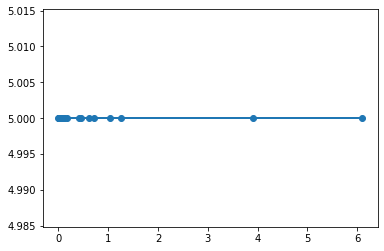

In [10]:
X = pd.DataFrame(df['Eslint Errors per 100 lines'])
y = pd.DataFrame(df['Stars'])

model = LinearRegression()
model.fit(X, y)

Y_pred = model.predict(X)  # make predictions
print(df)
plt.scatter(X , y)
plt.plot(X, Y_pred)

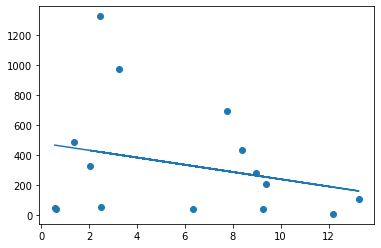

In [6]:
df2 = df.dropna(subset=['Contributors']) # drop rows with nan for contributors
X = pd.DataFrame(df2['Eslint Errors per 100 lines'])
y = pd.DataFrame(df2['Contributors'])

model = LinearRegression()
model.fit(X, y)

Y_pred = model.predict(X)  # make predictions
plt.scatter(X , y)
plt.plot(X, Y_pred)
